# Analyse boursière

In [5]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Reds_r')
sns.set_context("paper", font_scale=1.5,)

from datetime import datetime

In [6]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [7]:
from pandas_datareader import data as pdr

# Quels sont les données à analyser ?

### Entrer le ou les codes relative à votre portefeuille - séparer les actions par des espaces :

In [8]:
input_string = input("Code du portefeuille (exemple : AMZN GOOG AAPL MSFT) : ")
stock_list  = input_string.split()

Code du portefeuille (exemple : AMZN GOOG AAPL MSFT) : AMZN GOOG AAPL MSFT


NB : plus le nombre d'action à analyser est important, plus le temps de traitement peut être long

### Entrer la période sur laquelle vous voulez extraire vos données :

In [9]:
year_start = int(input("Année de la date de début d'analyse - format AAAA : "))
month_start = int(input("Mois de la date de début d'analyse - format MM : "))
day_start = int(input("Jour de la date de début d'analyse - format JJ : "))
year_end = int(input("Année de la date de fin d'analyse - format AAAA : "))
month_end = int(input("Mois de la date de fin d'analyse - format MM : "))
day_end = int(input("Jour de la date de fin d'analyse - format JJ : "))
start = datetime(year_start, month_start, day_start)
end = datetime(year_end, month_end, day_end)

Année de la date de début d'analyse - format AAAA : 2018
Mois de la date de début d'analyse - format MM : 01
Jour de la date de début d'analyse - format JJ : 01
Année de la date de fin d'analyse - format AAAA : 2020
Mois de la date de fin d'analyse - format MM : 12
Jour de la date de fin d'analyse - format JJ : 31


### Entrer le code de l'action qui fera l'objet de votre analyse :

In [10]:
stock_code = input("Code de l'action : ")

Code de l'action : MSFT


NB : le code de l'action doit faire partie du portefeuille rentré plus haut.

### Entrer le nombre de jour sur lequel vous voulez projetter votre analyse Monte Carlo :

In [11]:
day_monte_carlo = int(input("Nombre de jour (exemple : 365) : "))

Nombre de jour (exemple : 365) : 365


NB : plus le nombre de jour est important, plus le temps de traitement peut être long

# Aperçu de l'action sur la période

In [12]:
for stock in stock_list :
    globals()[stock] = pdr.get_data_yahoo(stock, start = start, end = end)

Si cette ligne présente une anomalie veuillez à vous assurez que les actions de votre portefeuille ait bien des données sur la période définie

In [13]:
globals()[stock_code].describe()

,High,Low,Open,Close,Volume,Adj Close
count,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.000000
mean,143.060198,139.986508,141.578625,141.602394,3.128605e+07,139.457150
std,42.309967,41.213525,41.749926,41.789630,1.425740e+07,42.771437
min,86.309998,83.830002,86.059998,85.010002,8.989200e+06,81.482643
25%,107.687498,105.282497,106.355001,106.277498,2.228988e+07,103.536074
50%,136.320000,133.575005,134.995003,135.349998,2.742470e+07,133.161766
75%,175.977497,171.152504,174.224998,174.422504,3.551928e+07,172.819950
max,232.860001,227.350006,229.270004,231.649994,1.112421e+08,231.045105


**Description des différentes colonnes/lignes obtenues :**
- **High** correspond au prix le plus élevé auquel s'est échangé l'action au cours de la journée;
- **Low** correspond au prix le moins élevé auquel s'est échangé l'action au cours de la journée;
- **Open** correspond au cours d'ouverture de la journée (début de la session de bourse);
- **Close** correspond au cours de cloture de la journée (fin de la session de bourse);
- **Volume** correspond au nombre d'opération qui ont eu lieu sur la journée;
- **Adj Close** correspond au cours de clôture après ajustement de tous les fractionnements et distributions de dividendes applicables. Les données sont ajustées à l’aide des multiplicateurs de fractionnement et de dividende appropriés, conformément à normes du Centre de recherche sur le cours des valeurs;
- **count** correspond au nombre de scéance de bourse qui ont eu lieu sur la période d'analyse que vous avez défini (il est normal que cette valeur soit la même pour toutes les colonnes);
- **mean** correspond à la moyenne des valeurs obtenues;
- **std** (standard deviation) correspond à l'écart type des valeurs obtenues - l'écart type étant une mesure de dispersion des données autour de la moyenne;
- **min** correspond à la valeur minimale atteinte sur la période;
- **25%** correspond au premier quartile - valeur en deça de laquelle on retrouve 25% de l'échantillon en nombre de valeur;
- **50%** correspond à la médiane - valeur en deça de laquelle on retrouve 50% de l'échantillon en nombre de valeur;
- **75%** correspond au troisième quartile - valeur en deça de laquelle on retrouve 75% de l'échantillon en nombre de valeur;
- **max** correspond à la valeur maximale atteinte sur la période.<br/>
<br/>
Ces informations nous permettent d'avoir une première idée des valeurs en bourse pour l'action choisie sur la période définie.


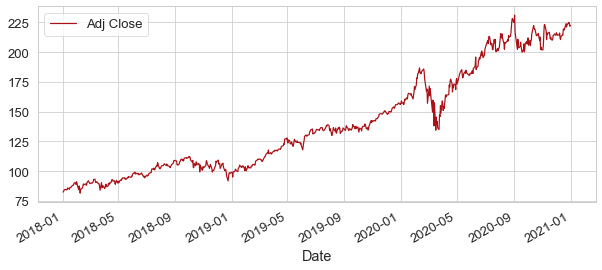

In [14]:
globals()[stock_code]['Adj Close'].plot(legend = True, figsize=(10,4))

**Visualisation de l'Adj Close sur la période**

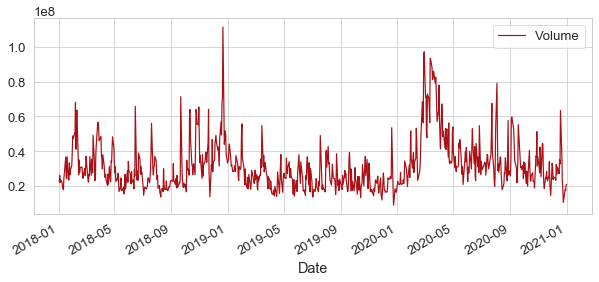

In [15]:
globals()[stock_code]['Volume'].plot(legend=True, figsize=(10,4))

**Visualisation du Volume sur la période**

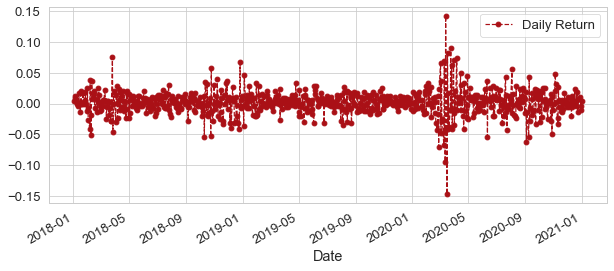

In [16]:
globals()[stock_code]['Daily Return'] = globals()[stock_code]['Adj Close'].pct_change()

globals()[stock_code]['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

**Visualiasation des gains/pertes journalières sur la période (en %)**

# Analyse par les moyennes mobiles (Simple Moving Average)

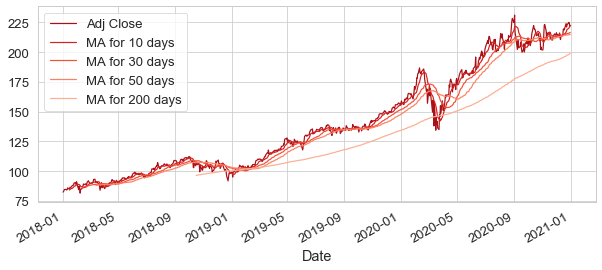

In [17]:
ma_day = [10, 30, 50, 200]

for ma in ma_day :
    column_name = 'MA for %s days' %(str(ma))
    
    globals()[stock_code][column_name] = pd.DataFrame.rolling(globals()[stock_code]['Adj Close'], ma).mean()

globals()[stock_code][['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 50 days', 'MA for 200 days']].plot(subplots=False, figsize=(10,4))

Ce graphique nous présente le **Moving Average (MA)** à 10, 20, 50 et 100 jours de l'action à analyser. <br/>
Le **MA** consiste à calculer des moyennes sur x jours de notre Adj Close chaque jour afin de tirer les tendances de l'action analysée. <br/>
L'analyse ci-dessus correspond à un Simple Moving Average sur la base de moyenne est n'est pas l'indicateur le plus adapté à des périodes d'analyse courte - contrairement à l'Exponentiel Moving Average.<br/>
<br/>
Les MA à 50 et 200 jours sont considérés par les traders comme des **signaux importants**. Les MA à moins de 50 jours sont plus adaptés à des investissements court terme alors que les MA à 50 jours ou plus à des investissements long terme. <br/>
Il est impossible de prédir le futur, le MA suit la tendance globale de l'Adj CLose, basé sur les informations passées. Il est nécessaire d'analyser le contexte de l'entreprise dans laquelle investir pour affiner son analyse. <br/>
<br/>
Une augmentation du MA indique une **tendance haussière**, une diminution indique uen **tendance à la baisse**. La **tendance haussière est confirmé** par un croisement entre une MA court terme et une MA long terme, au contraire la **tendance à la baisse est confirmé** par le croisement d'une MA court terme avec une MA long terme. <br/>
Lorsque l'Adj Close croise un MA, cela indique un **risque de changement de tendance**.<br/>
<br/>
Pour plus d'informations, ci-dessous des liens vers Investopedia pour affiner vos analyses :
* http://www.investopedia.com/terms/m/movingaverage.asp
* http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

# Analyse des corrélations entre les différentes actions du portefeuille

In [18]:
closing_df = pdr.get_data_yahoo(stock_list, start = start, end = end)['Adj Close']
stock_rets = closing_df.pct_change()

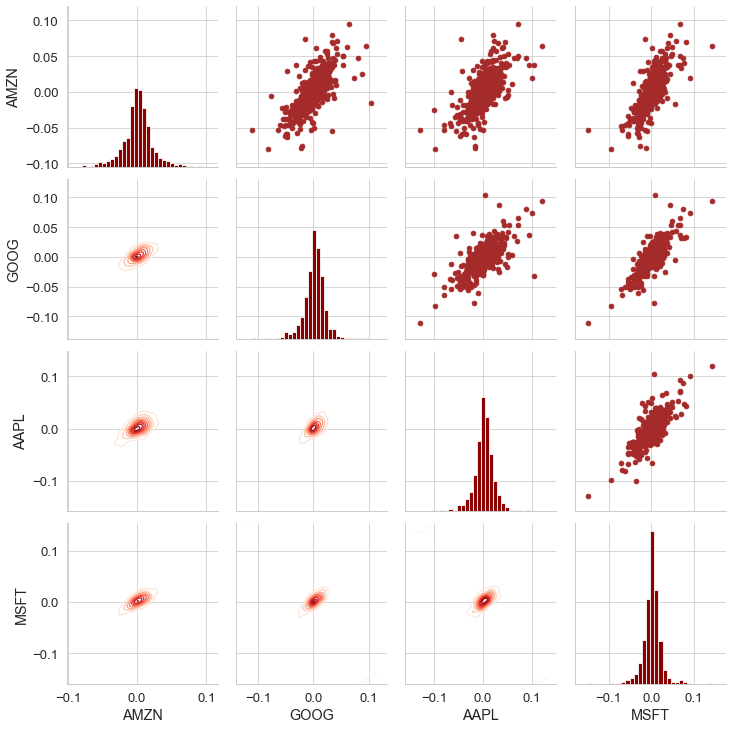

In [19]:
returns_fig = sns.PairGrid(stock_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'brown')
returns_fig.map_lower(sns.kdeplot,cmap='Reds')
returns_fig.map_diag(plt.hist, bins=30, color = 'Darkred')

**Analyse des corrélations sur les gains/pertes entre les différentes actions du portefeuille**

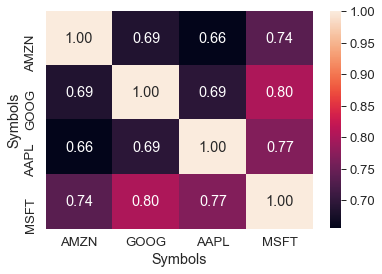

In [20]:
stock_rets_corr= stock_rets.dropna().corr()
sns.heatmap(stock_rets_corr, annot=True, fmt='.2f')
plt.show()

**Coefficient de Pearson (r) sur les gains/pertes entre les différentes actions du portefeuille**

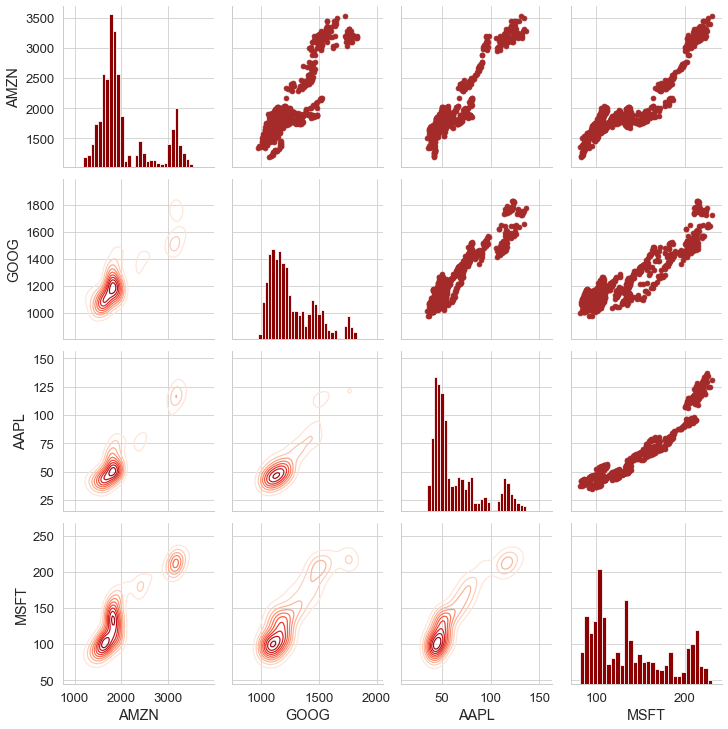

In [21]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color = 'brown')
returns_fig.map_lower(sns.kdeplot,cmap='Reds')
returns_fig.map_diag(plt.hist, bins=30, color = 'Darkred')

**Analyse des corrélations sur les Adj CLose entre les différentes actions du portefeuille**

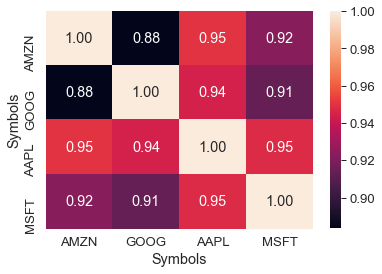

In [22]:
closing_df_corr= closing_df.dropna().corr()
sns.heatmap(closing_df_corr, annot=True, fmt='.2f')
plt.show()

**Coefficient de Pearson (r) sur les Adj CLose entre les différentes actions du portefeuille**

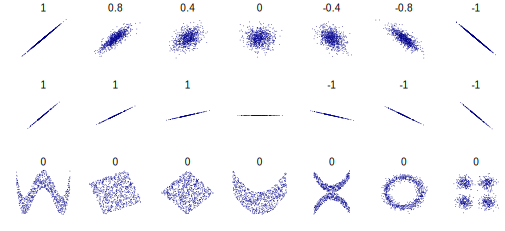

In [23]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Cette analyse permet :
- de savoir si les actions d'un même secteur sont corrélées;
- de savoir si le risque de notre portefeuille est suffisamment diversifié (diversifier son portefeuille avec des actions corrélées entre elle ne réduit pas forcément le risque de celui-ci). <br/>
<br/>
Le schéma ci-dessus présente les représentations graphiques de corrélations linéaires. <br/>
Un coefficient de Pierson a :
* -1 correspond à une forte corrélation inverse (si l'un augmente, l'autre diminue);
* 0 correspond a deux actions sans lien de corrélation entre elles;
* 1 correspond à une forte corrélation (si l'un augmente, l'autre augmente). <br/>
Plus l'on s'éloigne de 1 ou -1, moins la corrélation est forte.

# Analyse des risques  du portefeuille

In [24]:
rets = stock_rets.dropna()

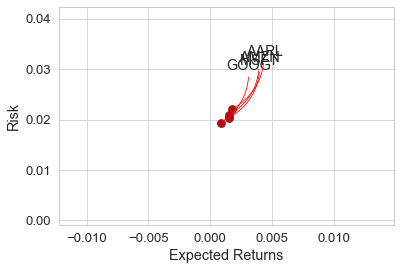

In [25]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color = 'red'))

L'abscisse Expected Returns correspond au gains/pertes journaliers potentiels de l'action en pourcentage. <br/>
L'ordonnée Risk correspond au risque que les gains/pertes potentiels réellement constaté diffère de celui calculé pour un interval de confiance donné.

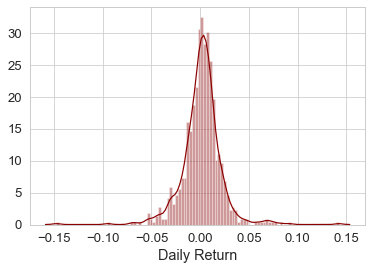

In [26]:
sns.distplot(globals()[stock_code]['Daily Return'].dropna(),bins=100, color='Darkred')

**Répartition des gains/pertes journalières sur la période pour l'action analysée (en %)**

## Evaluation du risque par les quantiles

In [28]:
print(round(rets[stock_code].quantile(0.05),2)," %")

-0.03  %


L'analyse par les quantiles permet d'analyser le risque d'une action. Le pourcentage affiché ci-dessus correspond à la perte maximale que l'on peut constater à un interval de confiance de 95%.

## Evaluation du risque par la méthode Monte Carlo

L'évaluation du risque avec la méthode Monte Carlo revient a simuler les évolutions possibles du cours d'une action sur une période définie. Cette simulation est effectué plusieurs fois afin d'analyser la répartion des gains/pertes potentiels à la fin de la période définie.<br/>
<br/>
Pour plus d'informations : http://www.investopedia.com/articles/07/montecarlo.asp

In [29]:
days = day_monte_carlo

dt = 1/days

mu = rets.mean()[stock_code]
sigma = rets.std()[stock_code]

In [30]:
def stock_monte_carlo(start_price, days, mu, sigma) :
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days) :
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

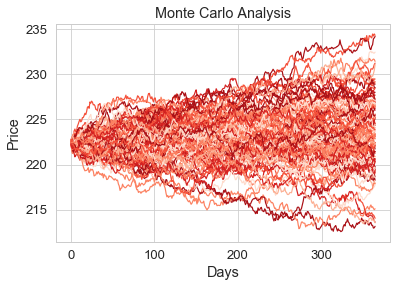

In [35]:
start_price = globals()[stock_code].iloc[-1]['Adj Close']

for run in range(100) :
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Monte Carlo Analysis')

In [32]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs) :
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

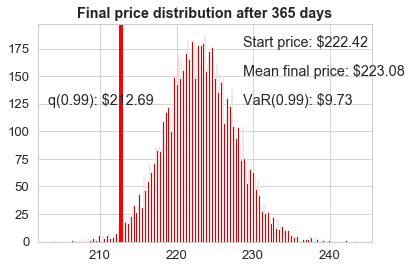

In [37]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins = 200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution after %s days" % days, weight='bold');

La méthode Monte Carlo nous permet d'obtenir la perte potentielle maximale dans 99% des cas. Cette perte correspond à la valeur VaR(0.99) imagée par la ligne rouge sur le graphique.